## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
df=pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'Disease' else 0)
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,0
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,1
2,Miles Wolf,62,0,3,130,263,1,97,0
3,Mikaila Block,43,1,1,115,303,1,181,1
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,1


In [3]:
X=df[['age', 'chol']]
y=df['diagnosis']
logreg=LogisticRegression()
logreg.fit(X,y)

LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

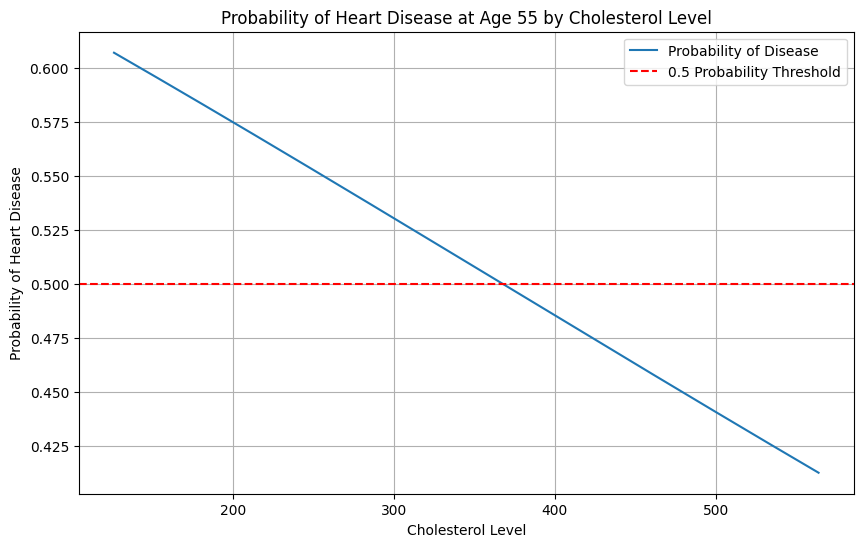

In [11]:
import matplotlib.pyplot as plt

# Age is fixed at 55
fixed_age = 55

min_chol=df['chol'].min()
max_chol=df['chol'].max()

# Generating the probabilities for the range of cholesterol levels
chol_range = range(min_chol, max_chol + 1)
probabilities_logreg = [logreg.predict_proba([[fixed_age, chol]])[0][1] for chol in chol_range]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(chol_range, probabilities_logreg, label='Probability of Disease')
plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Probability Threshold')
plt.xlabel('Cholesterol Level')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease at Age 55 by Cholesterol Level')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
print(f"Since the model decreases as cholestrol increases, the Cholestrol level for heart disease being diagnosed would be between {min_chol} and the intersection on the graph.")

Since the model decreases as cholestrol increases, the Cholestrol level for heart disease being diagnosed would be between 126 and the intersection on the graph.


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py

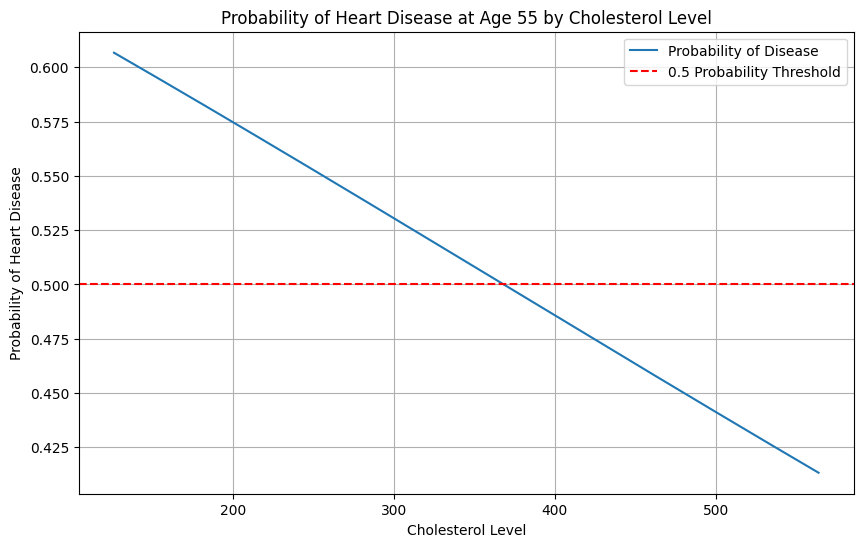

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(X,y)
probabilities_lda = [lda.predict_proba([[fixed_age, chol]])[0][1] for chol in chol_range]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(chol_range, probabilities_lda, label='Probability of Disease')
plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Probability Threshold')
plt.xlabel('Cholesterol Level')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease at Age 55 by Cholesterol Level')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Once again the model predicts that the chance of heart disease decreases as cholestrol increases, the Cholestrol level for heart disease being diagnosed would be between {min_chol} and the intersection on the graph.")

## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.1, 1, 10, 100]}  # Example range for C
svc = SVC(kernel='linear', probability=True)
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X, y)
best_c = clf.best_params_['C']
best_c

0.1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature na

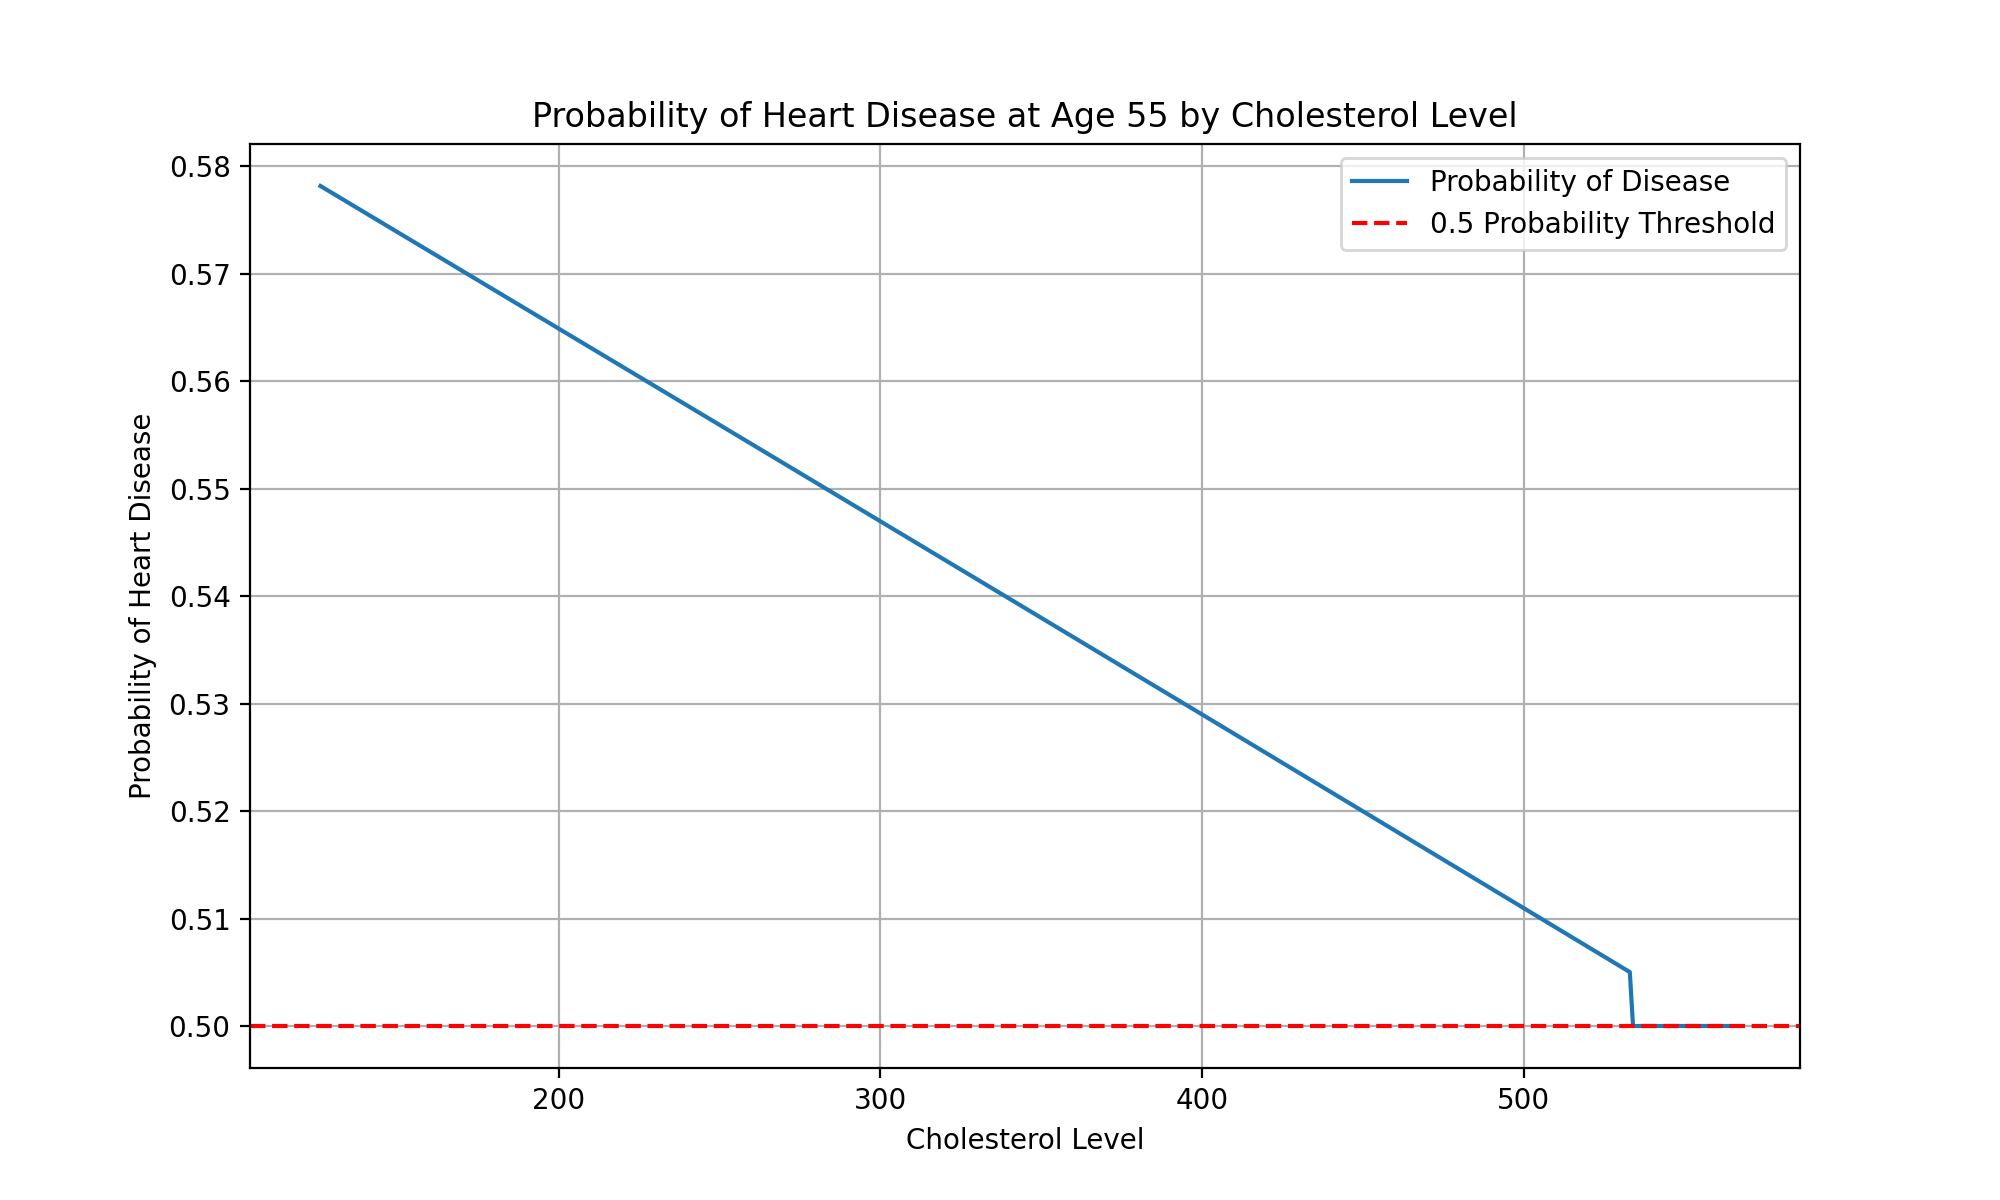

In [32]:
probabilities_clf = [clf.predict_proba([[fixed_age, chol]])[0][1] for chol in chol_range]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(chol_range, probabilities_clf, label='Probability of Disease')
plt.axhline(y=0.5, color='r', linestyle='--', label='0.5 Probability Threshold')
plt.xlabel('Cholesterol Level')
plt.ylabel('Probability of Heart Disease')
plt.title('Probability of Heart Disease at Age 55 by Cholesterol Level')
plt.legend()
plt.grid(True)
plt.show()

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

In [17]:
!pip install ggplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.7 MB/s eta 0:00:00


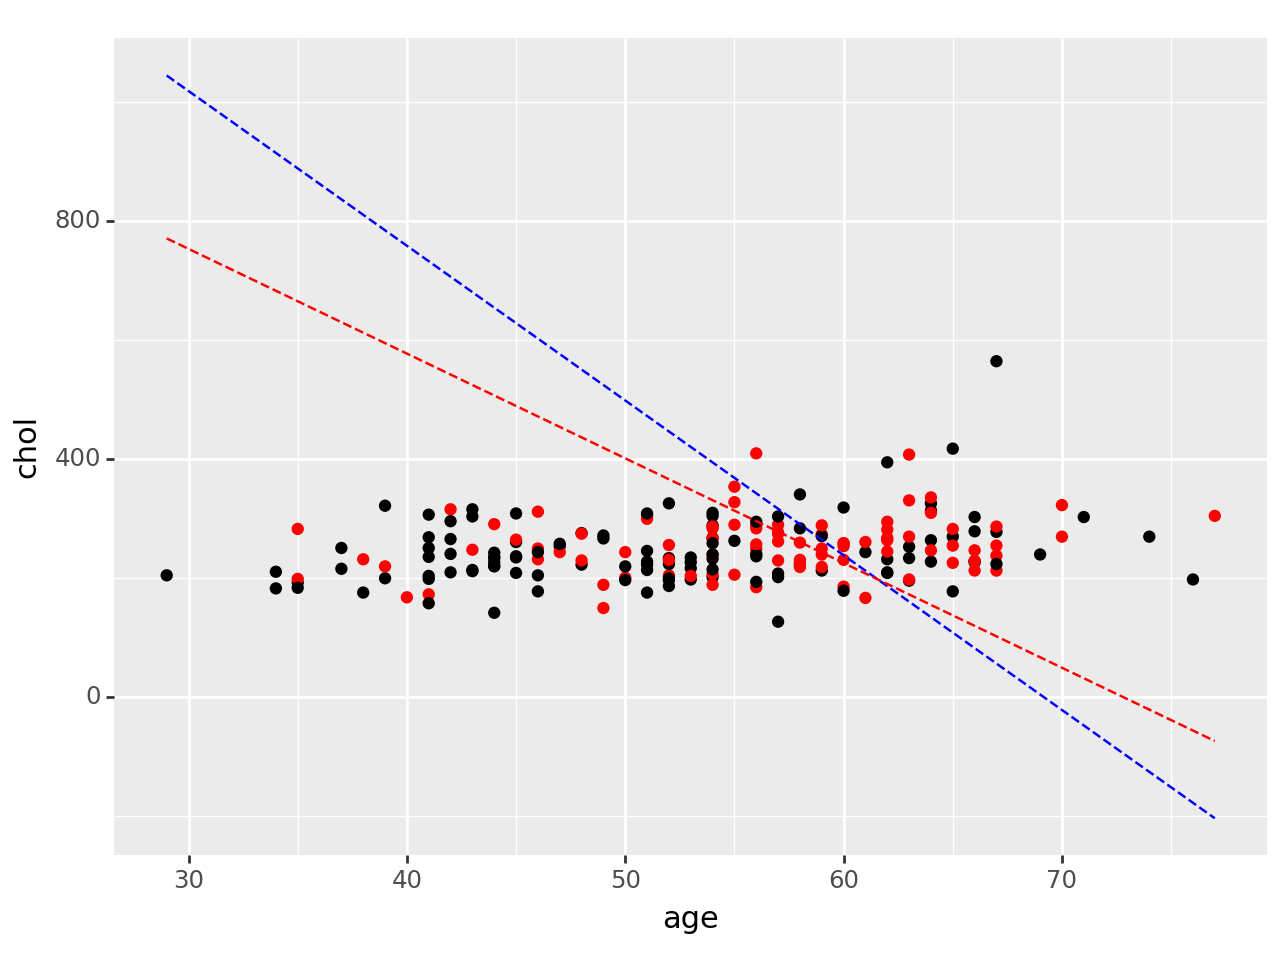

In [38]:
from plotnine import ggplot, aes, geom_point, geom_line, scale_color_manual
plot = ggplot(df, aes(x='age', y='chol')) + geom_point(color=df['diagnosis'].apply(lambda x: "black" if x == 1 else "red"))

#Logistic Decision Boundary
logreg_intercept = logreg.intercept_[0]
logreg_coefs = logreg.coef_[0]
logreg_db = (-logreg_intercept - logreg_coefs[0]*df['age']) / logreg_coefs[1]
plot += geom_line(aes(x=df['age'], y=logreg_db), color='blue', linetype='dashed')

# LDA Decision Boundary
#lda_intercept = lda.intercept_[0]
#lda_coefs = lda.coef_[0]
#lda_db = (-lda_intercept - lda_coefs[0]*df['age']) / lda_coefs[1]
#plot += geom_line(aes(x=df['age'], y=lda_db), color='green', linetype='dashed')

# SVC Decision Boundary (for linear kernel)
clf_model=clf.best_estimator_
clf_coefs = clf_model.coef_[0]
clf_intercept = clf_model.intercept_[0]
svc_db = (-clf_intercept - clf_coefs[0]*df['age']) / clf_coefs[1]
plot += geom_line(aes(x=df['age'], y=svc_db), color='red', linetype='dashed')

# Show plot
print(plot)

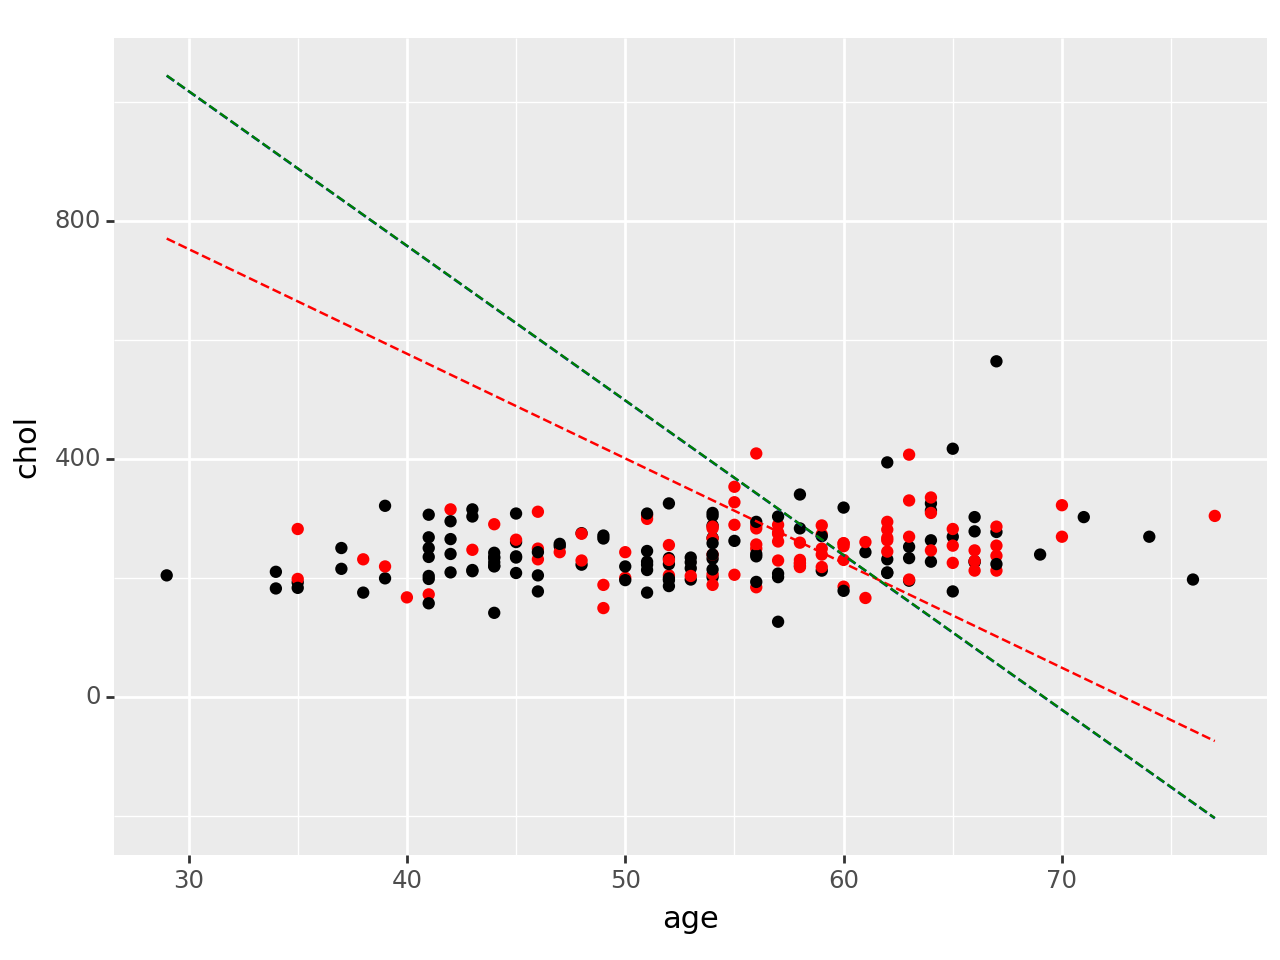

In [39]:
# LDA Decision Boundary
lda_intercept = lda.intercept_[0]
lda_coefs = lda.coef_[0]
lda_db = (-lda_intercept - lda_coefs[0]*df['age']) / lda_coefs[1]
plot += geom_line(aes(x=df['age'], y=lda_db), color='green', linetype='dashed')
print(plot)

from re plotting the decision boundaries the decision boundaries for the logistic regression and lda fall on top of each other.